# YANG ERROR GARA GARA GANTI DATASET

In [9]:
import pandas as pd

In [10]:
reviewer = pd.read_csv('review.csv')
reviewer.head()

,User_ID,Pemandu_ID,Rating,Review
0,USR0000,PMD212,5,Accusamus et voluptas natus maxime. Deserunt d...
1,USR0001,PMD181,3,At quidem fugit ipsum incidunt nulla. Inventor...
2,USR0002,PMD017,5,Vero corporis asperiores iure. Tempore archite...
3,USR0003,PMD108,1,Distinctio in provident vitae rerum. In non in...
4,USR0004,PMD184,3,Aliquid fuga sint quam quam quis.


In [11]:
reviewer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     1000 non-null   object
 1   Pemandu_ID  1000 non-null   object
 2   Rating      1000 non-null   int64 
 3   Review      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [12]:
pemandu = pd.read_csv('pemandu.csv')
pemandu.head()

,Pemandu_ID,Nama_Pemandu,Kemampuan_Bahasa,Umur,Jenis_Kelamin,Tempat,Pendidikan_Terakhir,Pekerjaan,Rating
0,PMD000,Unjani Aryani,Mandarin,36,Perempuan,Bandung,SD,Pedagang,5
1,PMD001,Mutia Suryatmi,Mandarin,35,Perempuan,Jakarta,SMP,PNS,2
2,PMD002,Cinthia Hartati,Inggris,34,Perempuan,Bandung,SMP,Guru,4
3,PMD003,Yono Gunarto,Jepang,34,Laki-laki,Bandung,SMP,Pedagang,1
4,PMD004,Harsana Sitorus,Mandarin,25,Laki-laki,Maluku,SD,Wiraswasta,2


In [13]:
pemandu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Pemandu_ID           400 non-null    object
 1   Nama_Pemandu         400 non-null    object
 2   Kemampuan_Bahasa     400 non-null    object
 3   Umur                 400 non-null    int64 
 4   Jenis_Kelamin        400 non-null    object
 5   Tempat               400 non-null    object
 6   Pendidikan_Terakhir  400 non-null    object
 7   Pekerjaan            400 non-null    object
 8   Rating               400 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 28.2+ KB


In [14]:
#PAKE CARA KLASIFIKASI
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, concatenate

# Read data from CSV
data = pd.read_csv('pemandu.csv')

# Preprocess data
encoder_tempat = LabelEncoder()
data['Tempat'] = encoder_tempat.fit_transform(data['Tempat'])

# Encode Pemandu_ID
encoder_pemandu = LabelEncoder()
data['Pemandu_ID'] = encoder_pemandu.fit_transform(data['Pemandu_ID'])

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define input dimensions
num_tempat = len(encoder_tempat.classes_)
num_pemandu = len(encoder_pemandu.classes_)

# Build the model
model = Sequential()
model.add(Embedding(num_tempat, 10, input_length=1))
model.add(Flatten())
model.add(Dense(160, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(360, activation='relu'))
model.add(Dense(num_pemandu, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare the input features and target
X_train = train_data[['Tempat']]
y_train = train_data['Pemandu_ID']
X_test = test_data[['Tempat']]
y_test = test_data['Pemandu_ID']

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Example input for recommendation
input_tempat = 'Bali'
input_tempat_encoded = encoder_tempat.transform([input_tempat])

# Prepare the input for prediction
input_features = np.array(input_tempat_encoded).reshape((-1, 1))

# Perform prediction
predicted_pemandus = model.predict(input_features)

# Get the top recommended Pemandu_IDs
num_recommendations = 5
top_pemandu_ids = np.argsort(predicted_pemandus, axis=1)[:, -num_recommendations:]

# Convert Pemandu_IDs back to original labels
recommended_pemandus = encoder_pemandu.inverse_transform(top_pemandu_ids.reshape(-1))

# Reshape the recommendations to a matrix
recommended_pemandus = recommended_pemandus.reshape((-1, num_recommendations))

# Print the recommended Pemandu_IDs
print('Pemandu_ID yang direkomendasikan:')
for i, recommendations in enumerate(recommended_pemandus):
    print(f'Input: Tempat={input_tempat}')
    print(f'Recommendations {i+1}:')
    for pemandu_id in recommendations:
        print(f'- Pemandu_ID: {pemandu_id}')
    print()


Epoch 1/10
10/10 [==============================] - 4s 86ms/step - loss: 5.9950 - accuracy: 0.0000e+00 - val_loss: 6.0011 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 28ms/step - loss: 5.9861 - accuracy: 0.0094 - val_loss: 6.0194 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 27ms/step - loss: 5.9717 - accuracy: 0.0125 - val_loss: 6.0815 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 25ms/step - loss: 5.9200 - accuracy: 0.0094 - val_loss: 6.3498 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 5.7624 - accuracy: 0.0125 - val_loss: 7.3609 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 26ms/step - loss: 5.4426 - accuracy: 0.0125 - val_loss: 9.5348 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 30ms/step - loss: 5.0105 - accuracy: 0.0094 - val_loss: 12.4956 - val_a

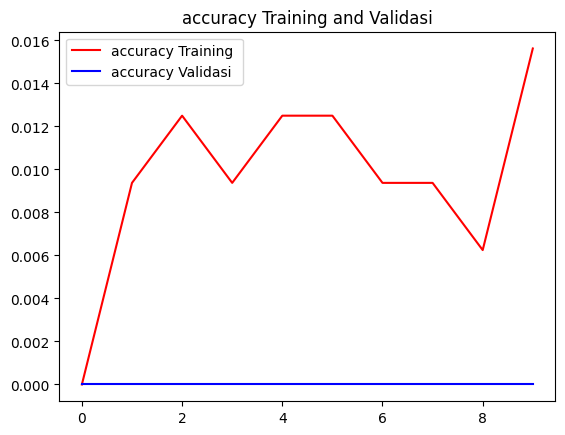

<Figure size 640x480 with 0 Axes>

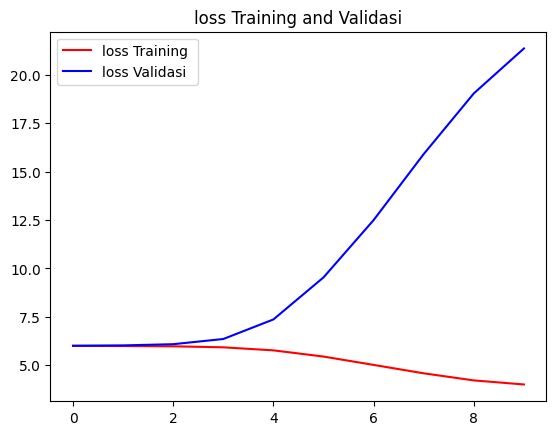

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='accuracy Training ')
plt.plot(epochs, val_acc, 'b', label='accuracy Validasi')
plt.title('accuracy Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='loss Training ')
plt.plot(epochs, val_loss, 'b', label='loss Validasi')
plt.title('loss Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
pemandu = pd.read_csv('pemandu.csv')
# Mencari pemandu dengan ID "PMD214" menggunakan metode loc
pemandu_pmd214 = pemandu.loc[pemandu['Pemandu_ID'] == 'PMD137']

# Mencetak hasil
pemandu_pmd214

,Pemandu_ID,Nama_Pemandu,Kemampuan_Bahasa,Umur,Jenis_Kelamin,Tempat,Pendidikan_Terakhir,Pekerjaan,Rating
137,PMD137,"drg. Kamila Yuliarti, M.M.",Mandarin,22,Perempuan,Makassar,S2,Pengusaha,1


In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Memuat dataset
data = pd.read_csv('pemandu.csv')

# Melakukan vektorisasi TF-IDF pada fitur "Tempat"
tfidf_tempat = TfidfVectorizer()
tfidf_matrix_tempat = tfidf_tempat.fit_transform(data['Tempat'])

# Mengubah matriks TF-IDF menjadi array
tfidf_matrix = tfidf_matrix_tempat.toarray()

# Mendapatkan indeks item berdasarkan input Tempat
def get_item_index_by_tempat(tempat, data):
    index = data[data['Tempat'] == tempat].index
    return index[0] if len(index) > 0 else None

# Membangun model sequential
model = Sequential([
    Dense(128, activation='relu', input_shape=(tfidf_matrix.shape[1],)),
    Dense(tfidf_matrix.shape[1], activation='linear')
])

# Compile model
model.compile(loss='cosine_similarity', optimizer='adam')

# Melatih model
model.fit(tfidf_matrix, tfidf_matrix, epochs=10)

# Merekomendasikan item berdasarkan Tempat
def recommend_items(tempat, tfidf_matrix, model, items=data[['Pemandu_ID', 'Nama_Pemandu', 'Kemampuan_Bahasa', 'Umur', 'Jenis_Kelamin', 'Tempat', 'Pendidikan_Terakhir', 'Pekerjaan', 'Rating']], k=5):
    indeks_item = get_item_index_by_tempat(tempat, data)
    if indeks_item is None:
        return pd.DataFrame()  # Mengembalikan dataframe kosong jika Tempat tidak ditemukan

    item_embedding = tfidf_matrix[indeks_item]
    item_embedding = np.reshape(item_embedding, (1, -1))

    similarity_scores = cosine_similarity(tfidf_matrix, item_embedding)
    similarity_scores = similarity_scores.flatten()

    indeks_terurut = np.argsort(similarity_scores)[::-1][:k]
    item_terrekomendasikan = items.iloc[indeks_terurut].copy()  # Add .copy() here

    # Mengurutkan berdasarkan Tempat terbaik
    item_terrekomendasikan = item_terrekomendasikan.sort_values('Tempat', ascending=False)

    # Prediksi menggunakan model
    item_embedding_pred = model.predict(item_embedding)
    similarity_scores_pred = cosine_similarity(tfidf_matrix, item_embedding_pred)
    similarity_scores_pred = similarity_scores_pred.flatten()

    indeks_terurut_pred = np.argsort(similarity_scores_pred)[::-1][:k]
    item_terrekomendasikan_pred = items.iloc[indeks_terurut_pred].copy()  # Add .copy() here

    # Mengurutkan berdasarkan Tempat terbaik
    item_terrekomendasikan_pred = item_terrekomendasikan_pred.sort_values('Tempat', ascending=False)

    return item_terrekomendasikan_pred

tempat_input = 'Bali'  # Ganti dengan input Tempat yang diinginkan

item_terrekomendasikan = recommend_items(tempat_input, tfidf_matrix, model, items=data[['Pemandu_ID', 'Nama_Pemandu', 'Kemampuan_Bahasa', 'Umur', 'Jenis_Kelamin', 'Tempat', 'Pendidikan_Terakhir', 'Pekerjaan', 'Rating']], k=5)

if item_terrekomendasikan.empty:
    print('Tidak ada item yang ditemukan untuk Tempat yang diberikan.')
else:
    # Menampilkan item yang direkomendasikan
    print(item_terrekomendasikan[['Pemandu_ID', 'Nama_Pemandu', 'Kemampuan_Bahasa', 'Umur', 'Jenis_Kelamin', 'Tempat', 'Pendidikan_Terakhir', 'Pekerjaan', 'Rating']])


Epoch 1/10
13/13 [==============================] - 2s 4ms/step - loss: -0.3097
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: -0.7091
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: -0.8878
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: -0.9589
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: -0.9875
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: -0.9973
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: -0.9996
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: -0.9999
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: -1.0000
Epoch 10/10
1/1 [==============================] - 0s 181ms/step
    Pemandu_ID       Nama_Pemandu Kemampuan_Bahasa  Umur Jenis_Kelamin Tempat   
250     PMD250      Jumadi Sinaga          Inggris    24     Laki-laki   Bali  \
318     PMD318  Fitriani Andriani         Mandarin   

In [18]:
item_terrekomendasikan

,Pemandu_ID,Nama_Pemandu,Kemampuan_Bahasa,Umur,Jenis_Kelamin,Tempat,Pendidikan_Terakhir,Pekerjaan,Rating
250,PMD250,Jumadi Sinaga,Inggris,24,Laki-laki,Bali,SD,Pedagang,4
318,PMD318,Fitriani Andriani,Mandarin,31,Perempuan,Bali,SD,Wartawan,5
368,PMD368,Estiawan Yuniar,Jepang,38,Perempuan,Bali,S1,Wartawan,3
306,PMD306,Tantri Hastuti,Jepang,28,Perempuan,Bali,SD,Dokter,3
307,PMD307,Bella Novitasari,Inggris,35,Laki-laki,Bali,S1,Guru,3
